In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv


In [2]:
# read the file 
selectedmicrodata = pd.read_csv('data/selected_microdata.csv', sep=',')

In [3]:
display(selectedmicrodata.sample())
display(selectedmicrodata.describe())

,Unnamed: 0,DonorName,RecipientName,IncomegroupName,USD_Commitment_Defl,USD_Received_Defl,ChannelReportedName,CommitmentDate
2,40966,Germany,Egypt,LMICs,4.22692,NaN,NaN,2004-12-31


,Unnamed: 0,USD_Commitment_Defl,USD_Received_Defl
count,944.000000,944.000000,856.0
mean,65082.006356,2.563430,0.0
std,67665.654590,9.406240,0.0
min,663.000000,0.000066,0.0
25%,20634.500000,0.029809,-0.0
50%,29349.000000,0.106630,0.0
75%,92148.250000,0.536132,0.0
max,271312.000000,141.626000,0.0


In [4]:
# Task: group by CommitmentDate (year) and RecipientName - sumup USD_Commitment_Defl

# 0) parse CommitmentDate as datetime while reading the csv-file
selectedmicrodata = pd.read_csv('data/selected_microdata.csv', sep=',',parse_dates=["CommitmentDate"])
display(selectedmicrodata.sample())

# 1) set the index to the CommitmentDate so pd.Grouper knows what to do
df = selectedmicrodata.set_index("CommitmentDate")
display(df.sample())

# 2) only show the features needed - keeping the index
df = df[['RecipientName','USD_Commitment_Defl']]
display(df.sample())

# 3) tell pd.Grouper to group by year (mont, day, hour...) for every RecipientName and sum/median/count/mean the groups 
gdf = df.groupby([pd.Grouper(freq="a"),'RecipientName'])
display(gdf.sum())


,Unnamed: 0,DonorName,RecipientName,IncomegroupName,USD_Commitment_Defl,USD_Received_Defl,ChannelReportedName,CommitmentDate
672,174308,Germany,Egypt,LMICs,15.5329,-0.0,KfW,2012-12-19


,Unnamed: 0,DonorName,RecipientName,IncomegroupName,USD_Commitment_Defl,USD_Received_Defl,ChannelReportedName
CommitmentDate,,,,,,,
2017-12-31,100808,Germany,Bolivia,LMICs,3.47447,0.0,GIZ


,RecipientName,USD_Commitment_Defl
CommitmentDate,,
NaT,Tanzania,0.123692


USD_Commitment_Defl
CommitmentDate RecipientName                     
2004-12-31     Bangladesh                0.429695
               Bolivia                   0.244541
               Colombia                  0.089723
               Egypt                     9.254943
               Ethiopia                  0.430864
...                                           ...
2019-12-31     Lebanon                   0.529240
               Rwanda                    0.038839
               Sudan                     3.716545
               Tanzania                 36.053576
               Uganda                    2.614809

[142 rows x 1 columns]

USD_Commitment_Defl                               \
                                             sum count        min         max   
CommitmentDate RecipientName                                                    
2004-12-31     Bangladesh               0.429695     1   0.429695    0.429695   
               Bolivia                  0.244541     3   0.076775    0.084722   
               Colombia                 0.089723     1   0.089723    0.089723   
               Egypt                    9.254943     5   0.040987    4.226920   
               Ethiopia                 0.430864     4   0.034097    0.262224   
               India                    0.723846     7   0.052837    0.221209   
               Kenya                   21.322563     9   0.056232   13.385200   
               Lebanon                  0.414323     3   0.035182    0.338154   
               Rwanda                   0.097571     1   0.097571    0.097571   
               Tanzania                20.655512     5   0.081650   13.247200   
               Uganda                  28.335475     5   0.029377   23.052200   
2005-12-31     Bangladesh               0.431207     1   0.431207    0.431207   
               Bolivia                  0.253645     4   0.030646    0.126191   
               Burundi                 29.322272     3   0.004532   23.704900   
               Colombia                 0.127818     2   0.035501    0.092317   
               Egypt                    4.998784    13   0.002470    3.928990   
               Ethiopia                 0.518949     3   0.052536    0.373829   
               India                    0.558128    10   0.006062    0.187722   
               Kenya                   15.569210     9   0.010945   13.330500   
               Lebanon                 23.039011     7   0.004631   22.810400   
               Rwanda                   0.224683     2   0.065320    0.159363   
               Sudan                    0.036470     1   0.036470    0.036470   
               Tanzania                26.793007    13   0.008139   16.014800   
               Uganda                  18.218149     4   0.106405   17.651000   
2006-12-31     Bolivia                  4.791890     4   0.003385    4.536220   
               Burundi                 11.129800     1  11.129800   11.129800   
               Colombia                 0.003385     1   0.003385    0.003385   
               Egypt                    5.973815     7   0.001770    5.590560   
               Ethiopia                 0.127774     2   0.027815    0.099959   
               India                    7.125854    13   0.007639    4.192910   
               Kenya                   16.984527     8   0.024987   13.277600   
               Lebanon                  7.162987     4   0.015066    4.192910   
               Rwanda                   0.666373     2   0.012828    0.653546   
               Sudan                    0.001514     1   0.001514    0.001514   
               Tanzania                 1.575501     8   0.003285    0.774294   
               Uganda                   1.050698     4   0.031445    0.564722   
2007-12-31     Bolivia                  7.553240     2   2.746630    4.806610   
               Egypt                    2.746630     1   2.746630    2.746630   
               Lebanon                 13.733200     1  13.733200   13.733200   
               Tanzania                41.199490     5   1.010760   23.689700   
               Uganda                   8.789227     2   0.549327    8.239900   
2008-12-31     Egypt                   38.968500     2  10.438000   28.530500   
               Kenya                   38.053500     1  38.053500   38.053500   
2009-12-31     Burundi                  5.156990     1   5.156990    5.156990   
               Egypt                   52.993700     3  17.373500   17.810100   
               Kenya                    8.018530     1   8.018530    8.018530   
               Lebanon                 13.364220     2   5.3

<AxesSubplot:xlabel='CommitmentDate'>

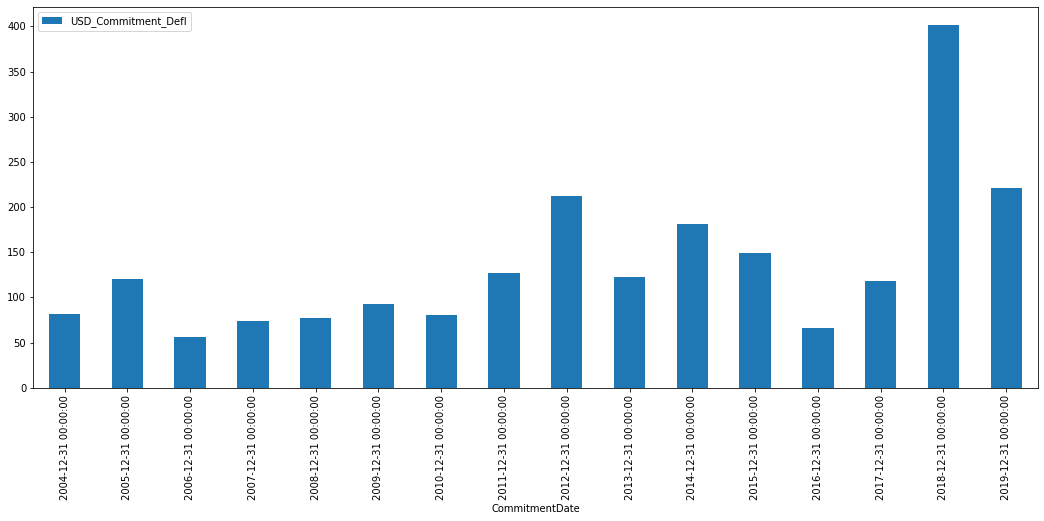

In [10]:
# hate those dots 
pd.set_option('display.max_rows', 600)
pd.set_option('display.max_columns', 600)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# and show me all simple aggregations for USD_Commitment_Defl at once
display(gdf.agg({'USD_Commitment_Defl':['sum','count','min','max','mean','median']}))

# as a freaky oneliner to draw the sum over over time
display(df.groupby([pd.Grouper(freq="a")]).sum().plot(kind="bar",figsize=(18,7)))
       